<a href="https://colab.research.google.com/github/cjflanagan/cs68/blob/master/Tech68_weekend_day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [65]:
# Importing the pandas library for data manipulation and analysis.
import pandas as pd

# Importing the statsmodels library for building and analyzing statistical models.
import statsmodels.api as sm

# Importing the matplotlib.pyplot module for creating static, interactive, and animated visualizations in Python.
import matplotlib.pyplot as plt

# Importing the seaborn library for making statistical graphics in Python. It is based on matplotlib.
import seaborn as sns

# Importing the 'data's module from vega_datasets for access to a variety of datasets for practice and demonstration purposes.
from vega_datasets import data


In [66]:
# Accessing the 'movies' dataset from the vega_datasets package and storing it in the variable 'movies_data'.
movies_data = data.movies()

# Displaying the first 5 rows of the 'movies_data' DataFrame to get an overview of the data structure and contents.
movies_data.head()


,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0


In [67]:
# Retrieving the dimensions of the 'movies_data' DataFrame as a tuple.
# This will show the number of rows and columns in the DataFrame (rows, columns).
movies_data.shape


(3201, 16)

<Axes: xlabel='Production_Budget', ylabel='Worldwide_Gross'>

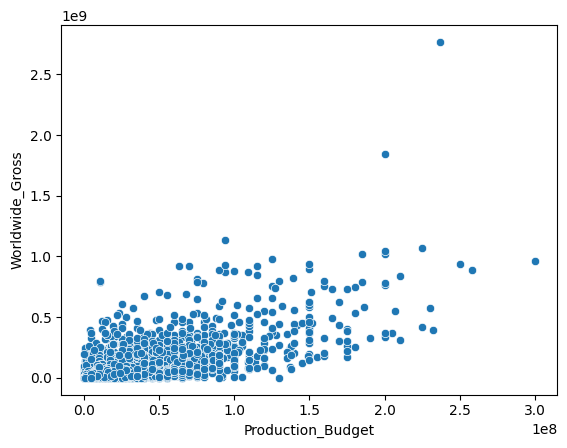

In [68]:
# Creating a scatter plot using Seaborn's scatterplot function.
# The x-axis represents the 'Production_Budget' of movies.
# The y-axis represents the 'Worldwide_Gross' earnings of movies.
# The data for the plot is sourced from the 'movies_data' DataFrame.
sns.scatterplot(y='Worldwide_Gross', x='Production_Budget', data=movies_data)

In [69]:
pd.DatetimeIndex(movies_data.Release_Date).year.value_counts()

,count
Release_Date,
2006,220
2005,210
2002,208
2004,192
2000,188
...,...
1938,1
1930,1
2037,1


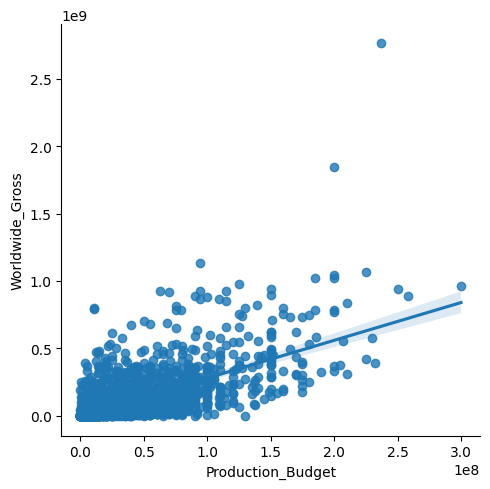

In [70]:
# Creating a linear regression plot using Seaborn's lmplot function.
# The x-axis represents the 'Production_Budget' of movies.
# The y-axis represents the 'Worldwide_Gross' earnings of movies.
# The data for the plot is sourced from the 'movies_data' DataFrame.
# This plot will also include a regression line indicating the trend or relationship between the two variables.
sns.lmplot(y='Worldwide_Gross', x='Production_Budget', data=movies_data)

In [71]:
# Removing all rows with missing values (NaNs) from the 'movies_data' DataFrame.
# The resulting DataFrame 'movies_data' will only contain rows where all columns have non-null values.
# This operation is done in-place, meaning the original 'movies_data' is modified directly.
movies_data = movies_data.dropna()

# Convert 'Worldwide_Gross' to numeric
movies_data['Worldwide_Gross'] = pd.to_numeric(movies_data['Worldwide_Gross'])

In [126]:
# Extracting the 'Worldwide_Gross' column from the 'movies_data' DataFrame and assigning it to the variable 'y'.
# This series 'y' will typically be used as the target variable for a machine learning model, representing the values we want to predict.
y = movies_data['Worldwide_Gross']

# Extracting the 'Production_Budget' column from the 'movies_data' DataFrame and assigning it to the variable 'X'.
# This series 'X' will typically be used as the feature/input variable for a machine learning model, representing the input data used to predict the target 'y'.
X = movies_data[['Production_Budget']]


In [127]:
# Adding a constant term to the 'X' variable using the statsmodels library's add_constant method.
# This is often done in regression models to include an intercept term in the model.
# The resulting 'X' will have an additional column with all values set to 1, representing the intercept coefficient.
X = sm.add_constant(X)
X.head()


,const,Production_Budget
1064,1.0,20000000.0
1074,1.0,200000000.0
1090,1.0,60000000.0
1095,1.0,48000000.0
1107,1.0,30000000.0


In [128]:
# Creating an Ordinary Least Squares (OLS) regression model using the statsmodels library.
# The 'y' variable represents the dependent variable, while 'X' includes the independent variables (predictors).
# This line initializes the OLS model with the given data but does not yet perform the regression analysis.


model = sm.OLS(y, X)

# Fitting the OLS model to the provided data.
# This step performs the actual regression analysis, computing the best fit line that minimizes the sum of squared residuals.
results = model.fit()

# Printing a summary of the regression results.
# The summary provides detailed information about the fit of the model, including statistics like R-squared,
# coefficients for each predictor, standard errors, p-values, and confidence intervals among others.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Worldwide_Gross   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     278.8
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           7.95e-38
Time:                        05:31:21   Log-Likelihood:                -3516.7
No. Observations:                 174   AIC:                             7037.
Df Residuals:                     172   BIC:                             7044.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.642e+06   1.66e+0

In [129]:
# Selecting specific columns from a DataFrame named 'movies_data'.
# The columns selected are 'Production_Budget' and 'Major_Genre', which will be used as features or predictors.
# This line creates a new DataFrame 'X' that contains only the specified columns.
X = movies_data[['Production_Budget', 'Major_Genre']]
X = sm.add_constant(X)
X


,const,Production_Budget,Major_Genre
1064,1.0,20000000.0,Action
1074,1.0,200000000.0,Action
1090,1.0,60000000.0,Action
1095,1.0,48000000.0,Western
1107,1.0,30000000.0,Thriller/Suspense
...,...,...,...
3158,1.0,6000000.0,Drama
3181,1.0,60000000.0,Comedy
3183,1.0,50000000.0,Comedy
3195,1.0,23600000.0,Comedy


In [130]:
# Converting the categorical column 'Major_Genre' into multiple binary (dummy) columns using one-hot encoding.
# This is done so that the categorical data can be used in machine learning models which require numerical input.
# The 'get_dummies' function from pandas is used for this conversion.
X = pd.get_dummies(X, columns=['Major_Genre'], dtype=int)

X.head()


,const,Production_Budget,Major_Genre_Action,Major_Genre_Adventure,Major_Genre_Black Comedy,Major_Genre_Comedy,Major_Genre_Documentary,Major_Genre_Drama,Major_Genre_Horror,Major_Genre_Musical,Major_Genre_Romantic Comedy,Major_Genre_Thriller/Suspense,Major_Genre_Western
1064,1.0,20000000.0,1,0,0,0,0,0,0,0,0,0,0
1074,1.0,200000000.0,1,0,0,0,0,0,0,0,0,0,0
1090,1.0,60000000.0,1,0,0,0,0,0,0,0,0,0,0
1095,1.0,48000000.0,0,0,0,0,0,0,0,0,0,0,1
1107,1.0,30000000.0,0,0,0,0,0,0,0,0,0,1,0


In [131]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 1064 to 3196
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   const                          174 non-null    float64
 1   Production_Budget              174 non-null    float64
 2   Major_Genre_Action             174 non-null    int64  
 3   Major_Genre_Adventure          174 non-null    int64  
 4   Major_Genre_Black Comedy       174 non-null    int64  
 5   Major_Genre_Comedy             174 non-null    int64  
 6   Major_Genre_Documentary        174 non-null    int64  
 7   Major_Genre_Drama              174 non-null    int64  
 8   Major_Genre_Horror             174 non-null    int64  
 9   Major_Genre_Musical            174 non-null    int64  
 10  Major_Genre_Romantic Comedy    174 non-null    int64  
 11  Major_Genre_Thriller/Suspense  174 non-null    int64  
 12  Major_Genre_Western            174 non-null    int6

In [132]:
y.shape

(174,)

In [133]:
# Importing the OLS (Ordinary Least Squares) model from the statsmodels library.
import statsmodels.api as sm

# Creating an OLS regression model instance with 'y' as the dependent variable and 'X' as the independent variables.
model = sm.OLS(y, X)

# Fitting the OLS model to the data. This will compute the best fit line that minimizes the sum of squared residuals.
results = model.fit()

# Printing a summary of the regression results.
# The summary includes statistics like R-squared, coefficients for each independent variable, p-values, etc.
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:        Worldwide_Gross   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     25.30
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           7.55e-30
Time:                        05:31:45   Log-Likelihood:                -3513.6
No. Observations:                 174   AIC:                             7051.
Df Residuals:                     162   BIC:                             7089.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

# Scaling

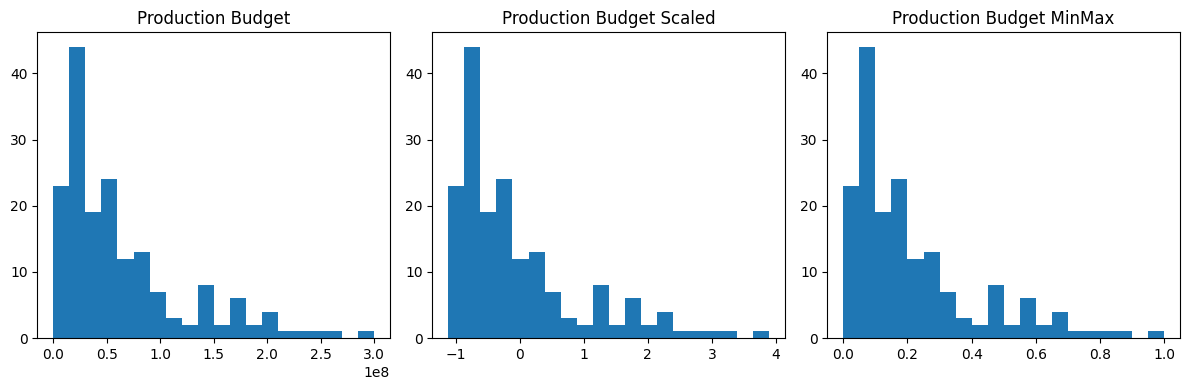

In [134]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

# Assuming 'X' is your DataFrame and 'production_budget' is the column you want to scale
scaler = StandardScaler()
min_max = MinMaxScaler(feature_range=(0, 1))  # You can adjust the range if needed

# Fit and transform 'production_budget' using the scaler
X['production_budget_scaled'] = scaler.fit_transform(X[['Production_Budget']])
X['production_budget_min_max'] = min_max.fit_transform(X[['Production_Budget']])

# Create histograms for the Production_Budget, production_budget_scaled, and production_budget_normalized columns
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(X['Production_Budget'], bins=20)
plt.title('Production Budget')

plt.subplot(1, 3, 2)
plt.hist(X['production_budget_scaled'], bins=20)
plt.title('Production Budget Scaled')

plt.subplot(1, 3, 3)
plt.hist(X['production_budget_min_max'], bins=20)
plt.title('Production Budget MinMax')

plt.tight_layout()
plt.show()


# Logistic regression

In [135]:
# Importing the pandas library for data manipulation and analysis.
import pandas as pd

# Importing the numpy library for numerical operations on arrays and matrices.
import numpy as np

# Importing the seaborn library for statistical data visualization.
import seaborn as sns

# Importing the pyplot module from matplotlib for plotting graphs and charts.
import matplotlib.pyplot as plt

# Importing the datetime class from the datetime module to work with dates and times.
from datetime import datetime

# Importing StandardScaler and LabelEncoder from sklearn.preprocessing.
# StandardScaler is used to standardize features by removing the mean and scaling to unit variance.
# LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1.
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Importing train_test_split function from sklearn.model_selection to split the dataset into training and test sets.
from sklearn.model_selection import train_test_split

# Importing the LogisticRegression class from sklearn.linear_model to perform logistic regression.
from sklearn.linear_model import LogisticRegression

# Importing roc_curve from sklearn.metrics to compute the receiver operating characteristic (ROC) curve.
from sklearn.metrics import roc_curve

# Importing roc_auc_score from sklearn.metrics to compute the area under the ROC curve (AUC).
from sklearn.metrics import roc_auc_score

# Importing confusion_matrix from sklearn.metrics to compute the confusion matrix to evaluate the accuracy of a classification.
from sklearn.metrics import confusion_matrix


In [136]:
# Loading the employee attrition dataset from a specified URL into a pandas DataFrame.
# The dataset is in CSV (Comma Separated Values) format.
churn_data = pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/WA_Fn-UseC_-HR-Employee-Attrition.csv')
churn_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [137]:
# Counting the number of occurrences of each unique value in the 'Attrition' column of the churn_data DataFrame.
# This will give us an idea of the distribution of attrition (e.g., how many employees left the company vs stayed).
churn_data.Attrition.value_counts()


,count
Attrition,
No,1233
Yes,237


In [138]:
# Filtering the churn_data DataFrame to create a new DataFrame 'churned' that contains only the rows where Attrition is 'Yes'.
# This subset represents the employees who have left the company.
churned = churn_data[churn_data.Attrition == 'Yes']

# Similarly, creating another DataFrame 'not_churned' that includes the rows where Attrition is 'No'.
# This subset represents the employees who have stayed with the company.
not_churned = churn_data[churn_data.Attrition == 'No']


In [139]:
# Taking a random sample from the 'not_churned' DataFrame with the same number of rows as in the 'churned' DataFrame.
# This is done to create a balanced dataset for comparison or further analysis.
not_churned_sample = not_churned.sample(churned.shape[0])

# Displaying the shape (dimensions) of the 'not_churned_sample' DataFrame to verify the size of the sample.
# The output will show a tuple representing the number of rows and columns.
not_churned_sample.shape


(237, 35)

In [140]:
# Combining the 'churned' DataFrame with the 'not_churned_sample' DataFrame to create a new DataFrame 'new_data'.
# This is typically done to have a balanced dataset containing an equal number of churned and not-churned samples.
new_data = pd.concat([churned, not_churned_sample], ignore_index=True)

# Counting the occurrences of each unique value in the 'Attrition' column of the 'new_data' DataFrame.
# This is useful to verify that the dataset is balanced with respect to the target variable 'Attrition'.
new_data.Attrition.value_counts()


,count
Attrition,
Yes,237
No,237


In [141]:
# Importing the LabelEncoder class from sklearn.preprocessing to encode labels with value between 0 and n_classes-1.
from sklearn.preprocessing import LabelEncoder

# Applying Label Encoding to the 'Attrition' column of the 'new_data' DataFrame.
# This converts categorical text values into a numeric format which is necessary for modeling as most machine learning algorithms require numerical input.
# The 'fit_transform' method first fits the label encoder to the data (mapping each unique string to a number) and then transforms the data, replacing the strings with their corresponding numeric codes.
new_data['Attrition'] = LabelEncoder().fit_transform(new_data.Attrition)


In [142]:
# Selecting specific columns from the 'new_data' DataFrame to create a new DataFrame 'X'.
# The columns selected are 'YearsAtCompany' and 'WorkLifeBalance', which may be used as features for a machine learning model.
# By using double square brackets, we ensure that 'X' is a DataFrame rather than a Series, even though we are selecting only two columns.
X = new_data[['YearsAtCompany', 'WorkLifeBalance']]
X

,YearsAtCompany,WorkLifeBalance
0,6,1
1,0,3
2,4,3
3,5,3
4,4,3
...,...,...
469,13,3
470,2,3
471,21,4
472,5,2


In [143]:
# Normalizing the 'YearsAtCompany' column in the DataFrame 'X'.
# Each value in the 'YearsAtCompany' column is divided by the mean of the entire column.
# This operation standardizes the values around the mean, which can be beneficial for certain statistical analyses or machine learning algorithms.
X['YearsAtCompany'] = X.YearsAtCompany / X.YearsAtCompany.mean()

# Normalizing the 'WorkLifeBalance' column in the DataFrame 'X'.
# Similar to the 'YearsAtCompany' column, each value in the 'WorkLifeBalance' column is divided by the mean of that column.
# This normalization ensures that the scale of the 'WorkLifeBalance' feature is comparable to other features that may also be normalized.
X['WorkLifeBalance'] = X.WorkLifeBalance / X.WorkLifeBalance.mean()


/tmp/ipython-input-502695308.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['YearsAtCompany'] = X.YearsAtCompany / X.YearsAtCompany.mean()
/tmp/ipython-input-502695308.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['WorkLifeBalance'] = X.WorkLifeBalance / X.WorkLifeBalance.mean()


In [144]:
# Extracting the 'Attrition' column from the DataFrame 'new_data'.
# The extracted column is assigned to the variable 'y', which typically represents the target or dependent variable in machine learning.
# This operation is often performed when preparing data for training a predictive model, where 'Attrition' could be the feature we want to predict.
y = new_data.Attrition
y

,Attrition
0,1
1,1
2,1
3,1
4,1
...,...
469,0
470,0
471,0
472,0


In [145]:
# Split the data into train and temp sets (temp will be split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40)

# Now split the temp set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.625)  # 0.625 * 0.40 = 0.25

# X_train, y_train - Training set
# X_val, y_val - Validation set
# X_test, y_test - Test set

In [146]:
# Importing the LogisticRegression class from sklearn.linear_model module.
from sklearn.linear_model import LogisticRegression

# Instantiate a Logistic Regression classifier with an L2 penalty (Ridge regularization).
# The 'fit' method is used to train the model using the training data: X_train (input features) and y_train (target variable).
clf = LogisticRegression(penalty='l2').fit(X_train, y_train)

# After fitting the model, we use it to predict the probabilities of the positive class for the test set X_test.
# The 'predict_proba' method returns an array where each row corresponds to a sample in X_test and each column represents a class.
# Since we are interested in the probability of the positive class, we select the second column (index 1) for all rows.
predictions = clf.predict_proba(X_test)[:, 1]


/tmp/ipython-input-3720731817.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predictions)


<Axes: ylabel='Density'>

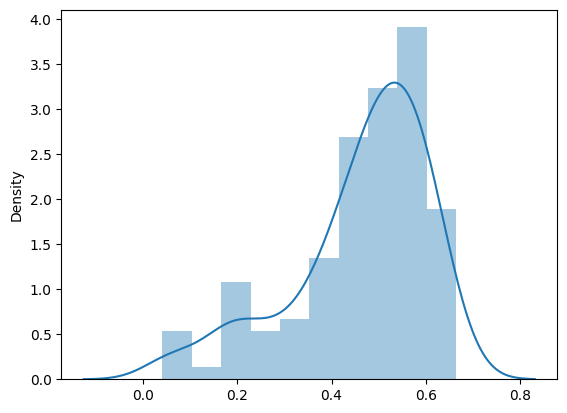

In [147]:
sns.distplot(predictions)

In [148]:
# Using the trained classifier 'clf' to predict the probabilities for each class given the test data 'X_test'.
# The 'predict_proba' method returns an array where each row corresponds to a sample in X_test.
# Each column in the output represents the probability of that sample belonging to a corresponding class.
y_pred = clf.predict_proba(X_test)


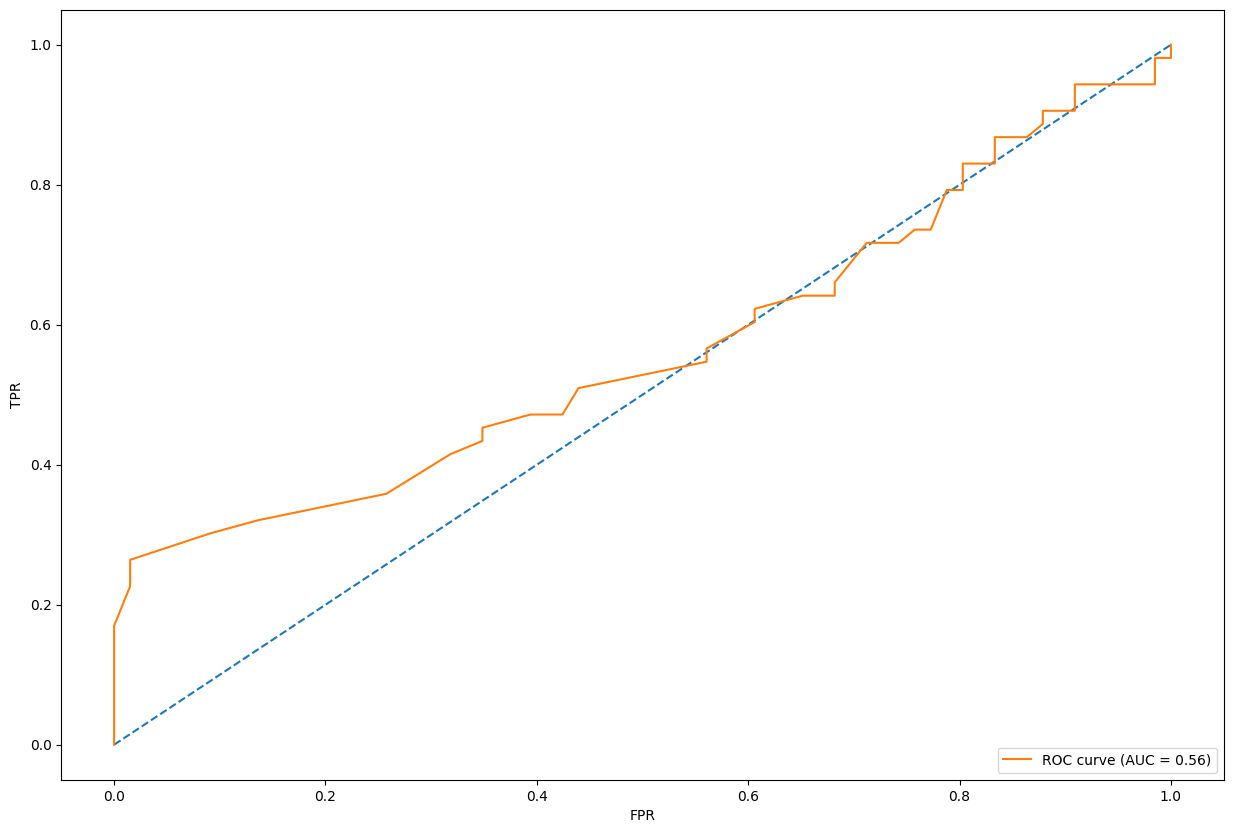

In [149]:
# Calculate the Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
# The 'roc_auc_score' function computes the ROC AUC score, which is a measure of the model's performance.
# A higher AUC value indicates better model performance.
auc = roc_auc_score(y_test, predictions)

# Calculate the ROC curve, which includes the False Positive Rate (FPR), True Positive Rate (TPR), and threshold values.
# The 'roc_curve' function returns the FPR, TPR, and thresholds for various decision boundaries given by 'predictions'.
fpr, tpr, _ = roc_curve(y_test, predictions)

# Initialize a new figure with a specified size to plot the ROC curve.
plt.figure(figsize=(15, 10))

# Plot a diagonal line that represents a no-skill classifier (random guessing).
# This serves as a baseline against which the model's ROC curve can be compared.
plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the ROC curve for the model using the calculated FPR and TPR.
# Label the curve with the AUC score rounded to two decimal places.
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)

# Set the X-axis label to 'False Positive Rate (FPR)'.
plt.xlabel('FPR')

# Set the Y-axis label to 'True Positive Rate (TPR)'.
plt.ylabel('TPR')

# Display the legend in the lower right corner of the plot.
# The legend contains information about the plotted lines, such as the label 'ROC curve'.
plt.legend(loc='lower right')

# Render the plot to the screen.
# This will display the figure with the ROC curve and all the labels and annotations.
plt.show()


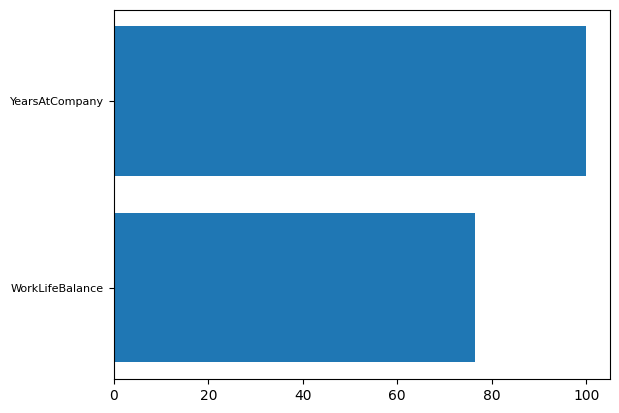

In [150]:
# Calculate the absolute value of the coefficients from a linear model (e.g., Logistic Regression).
# This is used to determine the importance of each feature in the model.
feature_importance = abs(clf.coef_[0])

# Normalize the feature importances by dividing by the maximum importance and scaling to 100.
# This allows for easier comparison between features as it puts them on a relative scale where the most important feature is 100.
feature_importance = 100.0 * (feature_importance / feature_importance.max())

# Get the indices that would sort the feature importances array.
# This is used later for ordering the features by their importance when plotting.
sorted_idx = np.argsort(feature_importance)

# Create an array with positions for each bar in the horizontal bar chart (y-axis positions).
pos = np.arange(sorted_idx.shape[0]) + .5

# Initialize a new figure object with a specified size for plotting the feature importances.
featfig = plt.figure()

# # Add a subplot to the figure with a 1x1 grid and make it the first (and only) subplot.
featax = featfig.add_subplot(1, 1, 1)

# Plot the feature importances as a horizontal bar chart.
# The bars are centered on the y-axis positions from 'pos', and ordered according to 'sorted_idx'.
featax.barh(pos, feature_importance[sorted_idx], align='center')

# Set the y-ticks to be at the center of each bar in the bar chart.
featax.set_yticks(pos)

# Label the y-ticks with the corresponding feature names, ordered by sorted_idx.
# The feature names are taken from the columns of the dataset 'X' used to train the model.
# The fontsize is set to 8 for readability.
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)

# Display the plot showing the normalized feature importances.
# This visualization helps in understanding which features have the most influence on the model's predictions.
plt.show()


# Trees

In [151]:
# Import the pandas library for data manipulation and analysis.
import pandas as pd

# Import the numpy library for numerical operations on arrays and matrices.
import numpy as np

# Import the seaborn library for statistical data visualization.
import seaborn as sns

# Import the pyplot module from matplotlib for plotting graphs and charts.
import matplotlib.pyplot as plt

# Import the datetime class from the datetime module for manipulating dates and times.
from datetime import datetime

# Import the StandardScaler and LabelEncoder classes from sklearn.preprocessing.
# StandardScaler is used to standardize features by removing the mean and scaling to unit variance.
# LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1.
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import the train_test_split function from sklearn.model_selection to split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split

# Import the LogisticRegression class from sklearn.linear_model for performing logistic regression.
from sklearn.linear_model import LogisticRegression

# Import the roc_curve function from sklearn.metrics to compute the Receiver operating characteristic (ROC).
from sklearn.metrics import roc_curve

# Import the roc_auc_score function from sklearn.metrics to compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
from sklearn.metrics import roc_auc_score

# Import the tree module from sklearn which includes decision tree-based models.
from sklearn import tree

# Import the preprocessing module from sklearn which includes scaling, centering, normalization, binarization methods.
from sklearn import preprocessing

# Import the DecisionTreeClassifier class from sklearn.tree for creating a decision tree classifier.
from sklearn.tree import DecisionTreeClassifier

# Import the StringIO class from six which is a Python 2 and 3 compatible version of StringIO.
from six import StringIO

# Import the Image class from IPython.display to display images in Jupyter notebooks or IPython shells.
from IPython.display import Image

# Import the export_graphviz function from sklearn.tree to export a decision tree in DOT format.
from sklearn.tree import export_graphviz

# Import the pydotplus library for generating complex graphs and converting DOT files to graphs.
import pydotplus


In [152]:
# Load the dataset from a CSV file located at the specified URL into a pandas DataFrame.
# The dataset contains information about customer churn for a telecommunications company.
telco_data = pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/Telco-Customer-Churn.csv')


In [153]:
# Convert the 'TotalCharges' column to a numeric data type. If conversion fails for any entry (e.g., due to non-numeric data),
# coerce that entry into NaN (Not a Number).
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')

# Print the number of missing values (NaN) in the 'TotalCharges' column after conversion.
print('Number of NAN values: {}'.format(telco_data.TotalCharges.isna().sum()))

# Remove all rows with missing values (NaN) from the DataFrame, modifying it in place.
telco_data.dropna(inplace=True)

# Delete the 'customerID' column from the DataFrame as it does not provide useful information for analysis.
del telco_data['customerID']


Number of NAN values: 8


In [154]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


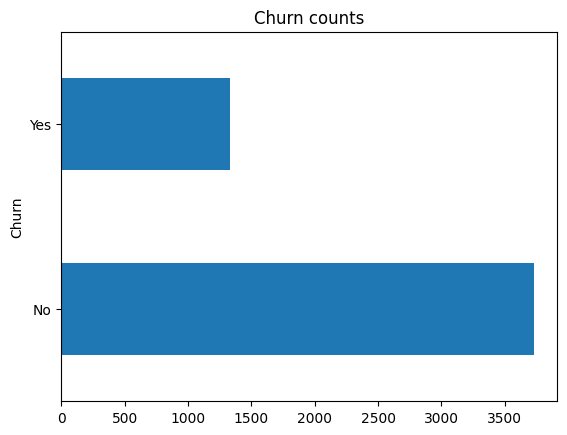

In [155]:
# Generate a horizontal bar plot showing the counts of unique values in the 'Churn' column.
# This visualizes how many customers have churned versus not churned.
telco_data.Churn.value_counts().plot(kind='barh', title='Churn counts')
plt.show()

In [156]:
# Replace categorical string values in the 'Churn' column with numerical values for analysis.
# 'Yes' is replaced with 1, indicating that the customer has churned.
# 'No' is replaced with 0, indicating that the customer has not churned.
telco_data.Churn = telco_data.Churn.replace({'Yes': 1, 'No': 0})  # Replacing 'Yes' and 'No' with numerical values


/tmp/ipython-input-3833594123.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_data.Churn = telco_data.Churn.replace({'Yes': 1, 'No': 0})  # Replacing 'Yes' and 'No' with numerical values


In [157]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [158]:
# Convert the 'Partner' column from categorical to numerical format for analysis.
# Replace 'Yes' with 1, indicating the presence of a partner.
# Replace 'No' with 0, indicating the absence of a partner.
telco_data['Partner'] = telco_data.Partner.replace({'Yes': 1, 'No': 0})

# Convert the 'gender' column from categorical to numerical format for analysis.
# Replace 'Female' with 1 and 'Male' with 0 to facilitate numerical computation.
telco_data['gender'] = telco_data.gender.replace({'Female': 1, 'Male': 0})


/tmp/ipython-input-2798588184.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_data['Partner'] = telco_data.Partner.replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-2798588184.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_data['gender'] = telco_data.gender.replace({'Female': 1, 'Male': 0})


In [159]:
# Remove the 'Churn' column from the telco_data DataFrame and store it in variable y.
# This operation is typically done to separate the target variable (label) from the features in a dataset.
y = telco_data.pop('Churn')  # Removing Churn field and storing it in variable y


In [160]:
# Identify all columns in the telco_data DataFrame that have a data type of 'object'.
# These are typically categorical columns. Then, convert the resulting index object to a list.
categorical_cols = telco_data.columns[telco_data.dtypes == 'object'].tolist()

# Display the list of categorical column names.
categorical_cols


['Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [161]:
# Define a list of categorical column names that are present in the telco_data DataFrame.
categorical_cols = ['InternetService', 'Contract', 'PaymentMethod']

# Create a new DataFrame called features_data by selecting specific columns from telco_data.
# This includes both numerical columns ('MonthlyCharges', 'tenure') and the categorical columns defined above.
features_data = telco_data[['MonthlyCharges', 'tenure'] + categorical_cols]

# Convert categorical column values into dummy/indicator variables (one-hot encoding).
# The get_dummies function is used to convert categorical variable(s) into dummy/indicator variables.
# The 'columns' parameter specifies which columns in the DataFrame to be converted.
# The 'drop_first' parameter is set to False, meaning it does not drop the first level of the categorical variables
# which would be done to avoid multicollinearity in some statistical models.
telco_data = pd.get_dummies(data=features_data, columns=categorical_cols, drop_first=False)

# Assign the transformed DataFrame with dummy variables to X, which typically represents feature data in machine learning.
X = telco_data


### Splitting data

In [162]:
# Split the dataset into training and testing sets.
# X represents the feature data, and y represents the target variable.
# The 'test_size' parameter specifies the proportion of the dataset to include in the test split (25% in this case).
# train_test_split returns four subsets: X_train (features for training), X_test (features for testing),
# y_train (target variable for training), and y_test (target variable for testing).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Further split the training set into a smaller training set and a validation set.
# This is done by taking the already split X_train and y_train and splitting them again.
# The 'test_size' parameter here specifies the proportion of the training data to include in the validation set (25% of the original training set).
# After this operation, X_train and y_train will be smaller, and we will have new subsets X_valid and y_valid for validation purposes.
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25)
X_train.head()

,MonthlyCharges,tenure,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2839,19.30,41,False,False,True,False,False,True,True,False,False,False
3577,65.40,36,True,False,False,False,True,False,False,False,False,True
1065,90.05,23,False,True,False,True,False,False,True,False,False,False
996,70.00,34,False,True,False,True,False,False,False,True,False,False
2296,45.20,1,True,False,False,True,False,False,False,False,True,False


# Decision Tree

In [163]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=3)
print(dt_model)

DecisionTreeClassifier(max_depth=3)


In [164]:
dt_model = dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict_proba(X_test)[:,1]
pred_dt


array([0.41721854, 0.21296296, 0.05194805, ..., 0.05194805, 0.20907298,
       0.05194805])

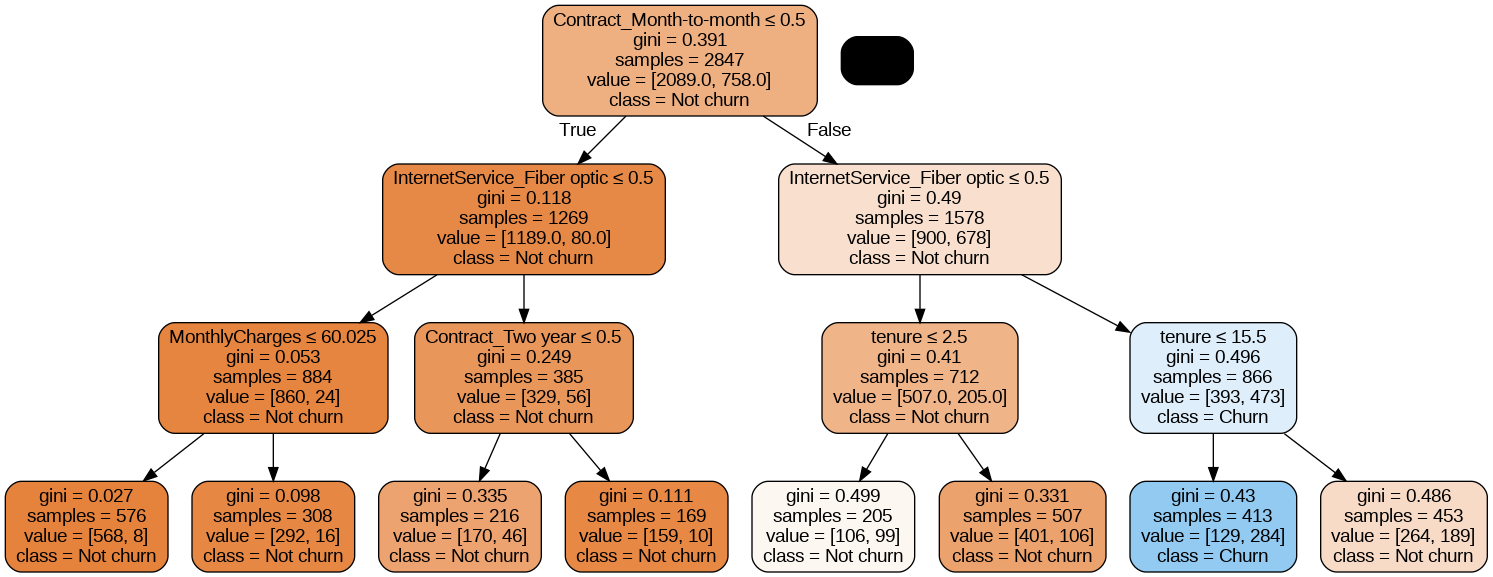

In [165]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns.values.tolist(),
               class_names=['Not churn', 'Churn'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [166]:
from sklearn.metrics import classification_report
pred_dt_binary = dt_model.predict(X_test)
print(classification_report(y_test, pred_dt_binary))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       927
           1       0.69      0.38      0.49       339

    accuracy                           0.79      1266
   macro avg       0.75      0.66      0.68      1266
weighted avg       0.78      0.79      0.77      1266



## Random Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

print(rf_model)

rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict_proba(X_test)[:,1]

RandomForestClassifier()


In [168]:
print(classification_report(y_test, pred_rf.round(0)))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       927
           1       0.57      0.49      0.52       339

    accuracy                           0.76      1266
   macro avg       0.70      0.68      0.68      1266
weighted avg       0.75      0.76      0.76      1266



## XGBoost

In [169]:
from xgboost import XGBClassifier
from xgboost import plot_importance

xgb_model = XGBClassifier()

print(xgb_model)

xgb_model.fit(X_train, y_train)
pred_xgb =  xgb_model.predict_proba(X_test)[:, 1]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

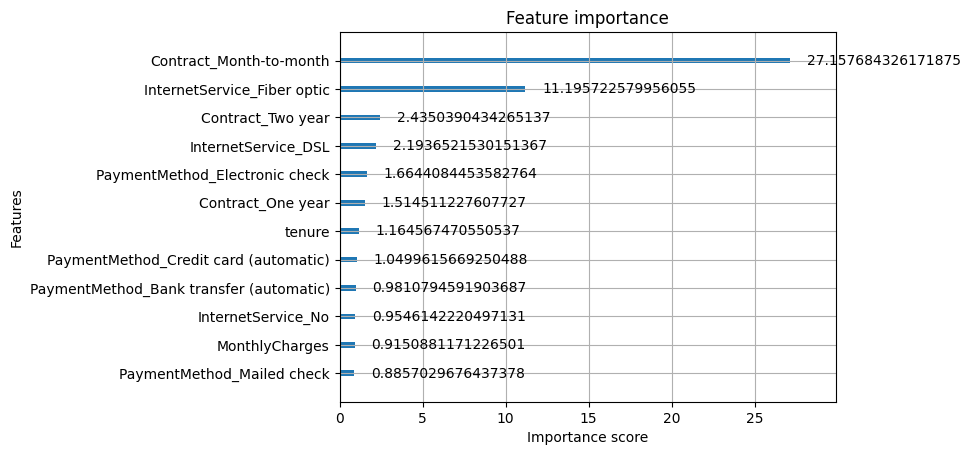

In [170]:
plot_importance(booster=xgb_model, importance_type='gain')

In [171]:
xgb_model.save_model('my_churn_model')

/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py:1028: UserWarning: [05:33:17] WARNING: /workspace/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)


In [172]:
!ls

my_churn_model	sample_data


In [173]:
model_saved = xgb_model.load_model('my_churn_model')
model_saved

In [174]:
def create_roc_plot(name, predictions):
  auc = roc_auc_score(y_test, predictions).round(2)
  fpr, tpr, _ = roc_curve(y_test, predictions)

  plt.figure(figsize=(5, 3))
  plt.plot([0, 1], [0, 1], linestyle='--')  # plot horizontal line
  plt.plot(fpr, tpr, label='{} AUC = {}'.format(name, auc)) # plot the roc curve for the model
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend(loc='lower right')  # show the legend
  plt.show() # show the plot
  return None

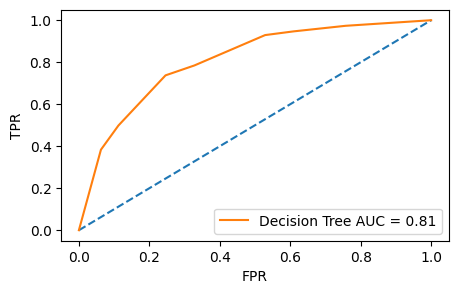

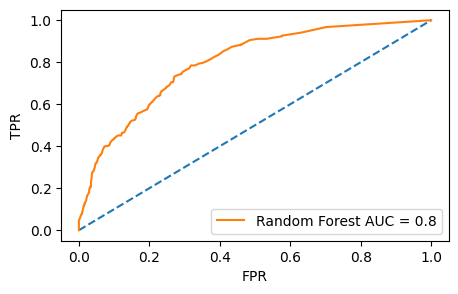

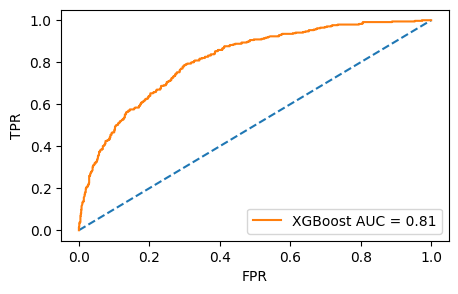

In [175]:
create_roc_plot('Decision Tree', pred_dt)
create_roc_plot('Random Forest', pred_rf)
create_roc_plot('XGBoost', pred_xgb)

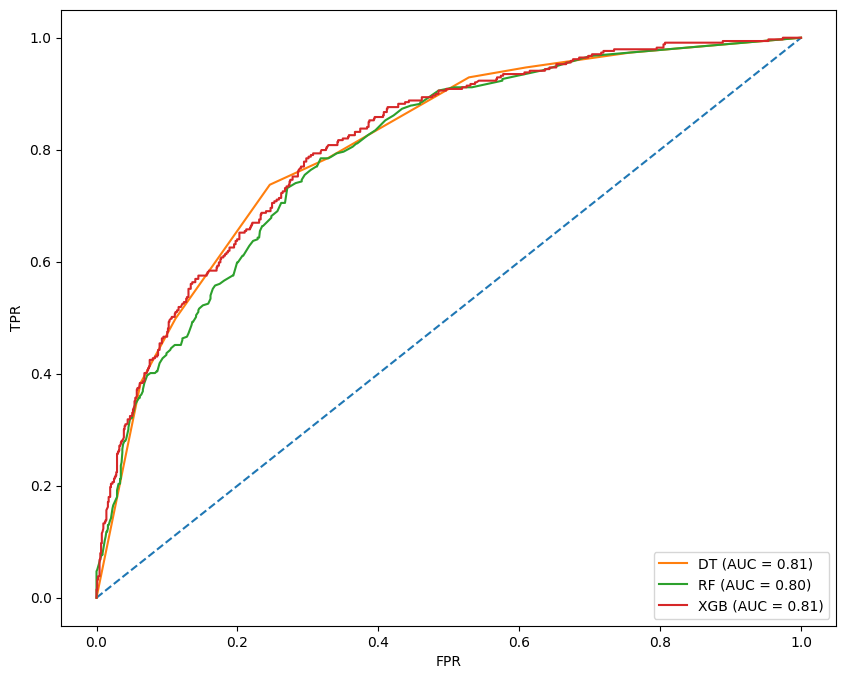

In [176]:
# calculate scores
auc_dt = roc_auc_score(y_test, pred_dt)
auc_rf = roc_auc_score(y_test, pred_rf)
auc_xgb = roc_auc_score(y_test, pred_xgb)

# calculate roc curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, pred_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, pred_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, pred_xgb)

plt.figure(figsize=(10, 8))
# plot horizontal line
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt, tpr_dt, label='DT (AUC = %0.2f)' % auc_dt)
plt.plot(fpr_rf, tpr_rf, label='RF (AUC = %0.2f)' % auc_rf)
plt.plot(fpr_xgb, tpr_xgb, label='XGB (AUC = %0.2f)' % auc_xgb)

# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

In [177]:
import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)


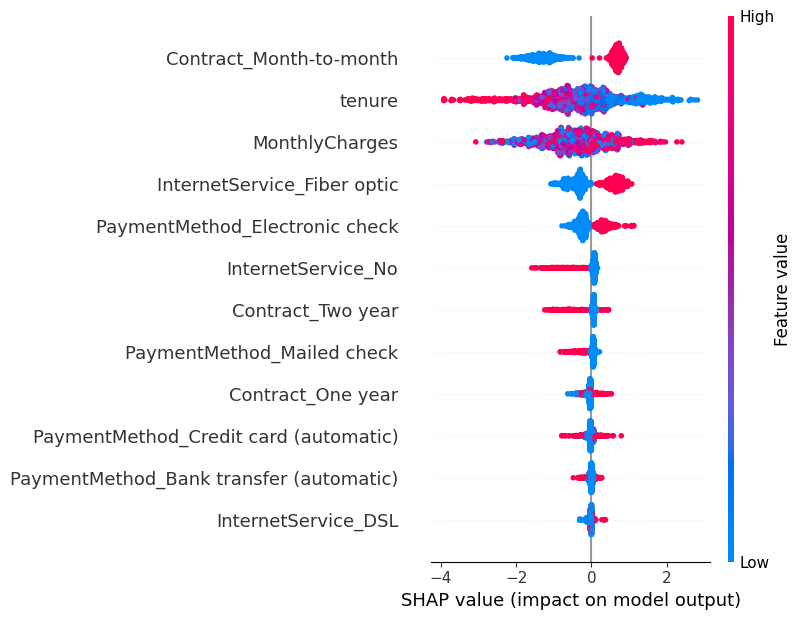

In [178]:
shap.summary_plot(shap_values, X_test)
